#### CMSE 801 Final Project
### &#9989; Rishabh Sareen
#### &#9989; 11/28/2021

# A Statistical Approach to Overbooking in Hotels

## Background and Motivation

Overbooking is used in many businesses such as airlines, cruise ships and even manufacturing. This project develops a profitable overbooking strategy using publicly available hotel cancellation data. The objective is to optimize the number of reservations given the uncertainty of a guest’s arrival subject to a penalty. Overbooking is optimized by finding when expected profit of one additional reservation no longer justifies the expected cost of the penalty. 

The goal of this project is to construct a profitable overbooking strategy. Publicly available hotel booking data allows for this strategy to be validated with a simulation. This strategy is constructed by making some assumptions about overbooking penalties, setting an arbitrary hotel capacity, and estimating the uncertainty of each arrival. Then this strategy is tested by resampling bookings until expected capacity is reached.

If the probability of a guest arriving to a hotel reservation is not one, then a hotel is certain to have empty rooms. This is where the opportunity presents itself. Implemented properly, this offers a hotel the opportunity to collect additional revenue without incurring the costs of increasing capacity. A profitable hotel overbooking strategy can be modified, repurposed, and increase revenues in industries where clients tend to cancel preordered products or services.





## Methodology

A guest making a hotel reservation is not certain to arrive. This uncertainty is defined as the probability of arrival $p$. A hotel will make many reservations and wonder how many arrivals A to expect given the number of bookings $b$. The number of arrivals A or fewer guests arriving follows a binomial distribution with a cumulative density function

$$F\left(A\middle| b,p\right)=\sum_{i=1}^{b}\binom{b}{i}p^i\left(1-p\right)^{b-i},\ \ A\le b,\ \ \ 0\le p\le1.$$

This function gives the probability of A or fewer guests arriving given the number of bookings, and probability of arrival. With this distribution, the total profit a hotel can expect while booking no more than capacity is

$$E\left[\mathrm{Total\ Profit}\right]=\pi bF\left(A\middle| b,p\right),\ A\le b,\ \ 0\le p\le1,\ \ \pi>\ 0.$$

Where $\pi$ denotes profit per arrival. Multiply profit, number of bookings, and sum probability of each arrival to get expected profit.  
Booking over capacity allows fewer empty rooms, at the cost of risking arrivals exceeding capacity. The penalties associated with overbooking should be carefully considered. This strategy assumes the cost of overbooking is providing each additional customer accommodations at a cost of four times profit $L = 4\pi$. Now relax the assumption that bookings $b$ is less than or equal to capacity $k$ and obtain
    
$$E_b\left[\mathrm{Total\ Profit}\right]=\pi bF\left(k\middle| b,p\right)-L\left(b-k\right)\left(1-F\left(k\middle| b,p\right)\right),\ 0\le p\le1,\ \pi>0.$$

This model estimates profit for a given number of bookings, accounting for the possibility of arrivals exceeding capacity. Determine the number of bookings that maximize profit by solving this equation for $b.$ Use an algorithm iterating over integer values of $b$ starting at capacity and stopping when

$$E_b\left[\mathrm{Total\ Profit}\right]>E_{b+1}\left[\mathrm{Total\ Profit}\right]. $$

The hotel booking data shows, on average, 64% of guests arrive.  Assume a 100-room hotel, the cost of overbooking is four times profit, and every guest has the same probability of arrival, maximize profit by booking 129 guests. The binomial distribution assumes that each p is the same for every trial. Assuming all customers have the same p, exposes the hotel to the inevitable event of booking too many customers highly likely to arrive and booking too few customers unlikely to arrive. The profitability of this strategy will depend on the ability to accurately estimate p for each reservation. Therefore, this strategy requires an estimate for p denoted by $\hat{p}.$
	This supports the claim that each guest has a different probability of arrival. Fit a linear regression model to the log odds of arrival 
$$\log{\left[\frac{\hat{p}}{1-\hat{p}}\right]}=\beta_0+\beta_1x_1+\beta_2x_2+\ \ldots\ +\beta_nx_n.$$
Exponentiate both sides and solve for $\hat{p}$
$$\hat{p}=\frac{exp\left(\beta_0+\beta_1x_1+\beta_2x_2+\ \ldots\ +\beta_nx_n\right)}{1+exp\left(\beta_0+\beta_1x_1+\beta_2x_2+\ \ldots\ +\beta_nx_n\right)}.$$

In addition to estimating $\hat{p}$ the values of \beta_i estimate the effect of variable $x_i.$

It has been shown that different guests have different probabilities of arrival. This overbooking strategy begins by estimating the probability a given guest will arrive. The closer $\hat{p}$ is to the true value of $p$, the more profitable this strategy will be. To validate this method, split the booking data into a training dataset and a testing data set. Rather than randomly selecting data, separate the data by the first 80% chronologically. Then fit and validate a predictive model. A logistic regression model estimates the probability arrival to be
$$\log{\left[\frac{\hat{p}}{1-\hat{p}}\right]}=\beta_0+\beta_1\left(customer\ type\right)+\beta_4\left(adults\right)+\beta_5\left(children\right)+\beta_6\left(babies\right)
+\ \beta_7\left(lead\ time\right)+\beta_8\left(stay\ length\right)+\beta_9\left(deposit\right).$$

These regression coefficients are all statistically significant. This supports the claim that the probability of arrival $p$ is not the same for each guest. Groups on average tend to have a higher arrival rate than individual short-term guests. The more adults in a single booking, the lower the expected arrival rate. Children seem to increase the odds of arrival until accounting for factors such as group, lead time, and stay length. Guests not making a deposit have a far higher arrival rate than those making non-refundable deposits. Closer inspection shows that non-refundable deposits are only asked of guests requesting flexible booking or have a history of cancelling reservations. 
	Use $\hat{p}$ to obtain the estimated fraction of capacity of the booking. Let $b^\ast$ be the optimal number of bookings $b$ where $$E_{b+1}\left[Total\ Profit\right]-E_b\left[Total\ Profit\right]=0,$$ given $\hat{p}.$ 

After obtaining b^\ast, find the expected fraction of capacity the guest consumes $C_f$ by taking the inverse of $b^\ast$, $$C_f=\frac{1}{b^\ast}.$$
Assign each booking an expected fraction of capacity. Then accept bookings until the total fraction of capacity exceeds 0.99.
$$\sum_{i} C_{fi}>0.99$$
The validation simulation randomly samples bookings, with replacement, on each date until estimated capacity is reached. 
	 This simulation assumes a hotel has a capacity of 100 rooms. Then to study the results of  $\hat{p}$ being the same sample as if  $\hat{p}\ =\ 0.64$ and book 129 guests every day. This involves sampling with replacement until there are 129 guests in a day. Then sample on the $b^\ast$ associated with each booking and sample for each day until $\sum_{i} C_{fi}>0.99.$ This results in an overbooking simulation of 162 days, where each day has bookings at capacity, overbooked assuming p is constant at 64%, and overbooking based on the estimate $\hat{p}.$ Then is experiment is repeated 2,500 times.


In [11]:
import matplotlib.pyplot as plt #Packages needed
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import random
from random import randint
from scipy.stats import binom
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [12]:
df = pd.read_csv("hotel.csv", index_col=0, parse_dates=True) #Loading the data#
df.not_canceled = df.not_canceled.astype(float)
df[df.hotel=="City Hotel"]
df = df.drop(["hotel"], axis=1)

In [13]:
df = pd.get_dummies(df)
df = df.replace(np.nan, 0)

In [14]:
def train_test_splitter(df, pct=0.8):  #Splitting into training and testing data set
    from datetime import timedelta
    timespan = (df.index.max() - df.index.min()).days
    train_date = round(timespan*pct)
    train = df.index.min() + timedelta(days=train_date)
    return [df[df.index <= train], df[df.index > train]]


train, test = train_test_splitter(df, 0.8)

In [15]:
X_train = train.drop(["not_canceled"], axis=1)
X_test = test.drop(["not_canceled"], axis=1)
y_train = train.not_canceled
y_test = test.not_canceled

In [16]:
from sklearn.linear_model import LogisticRegression #Performing logistic Regression to find out beta_i's
clf = LogisticRegression(random_state=0, max_iter=5000).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred)

array([[12238, 19098],
       [  980, 50089]])

In [8]:
p_arrival = clf.predict_proba(X_test) #Estimating p_hat
p_arrival = p_arrival[:,1]

In [10]:
def capacity_max(p, rooms=100, loss=4, min_p=0.065):  #Defining Cf function
    E, E_m1, Fx, P_overbook, bookings = 0, 0, 0, 0, rooms
    if p < min_p:  
        bookings = rooms * 10
    else:
        while(E_m1 >= E):
            E = bookings * Fx - loss * ((bookings - rooms) * P_overbook)
            Fx = binom.cdf(rooms, bookings, p)
            bookings = bookings + 1
            P_overbook =  1 - Fx
            E_m1 = bookings * Fx - loss * ((bookings - rooms) * P_overbook)
    return bookings

In [11]:
[capacity_max(p) for p in np.arange(0,1, 0.1)]

[1000, 797, 406, 276, 211, 172, 147, 129, 116, 106]

In [12]:
from tqdm import tqdm # progress bar
cap_max = []
for p in tqdm(p_arrival):
    cf = capacity_max(p)
    cap_max.append(cf)

100%|██████████| 36985/36985 [01:03<00:00, 581.12it/s] 


In [13]:
sim_df = pd.DataFrame(
    {
    "arrived":y_test,
    "p_arrival":p_arrival,
    "cap_max":cap_max
    }, index=X_test.index
)
sim_df["cap_frac"] = 1/sim_df.cap_max

In [15]:
def resample_from_reservations(df, strategy="pred_probs", p_thresh=0.99): 
    #Resampling function that simulate the overbooking strategy
    success = False
    niters = 0
    sample_rows = np.zeros(4) 
    while not success:
        rand_index = randint(0, df.shape[0]-1)
        rand_row = df.iloc[rand_index,:].values
        sample_rows = np.vstack((sample_rows, rand_row))
        if strategy == "capacity":
            niters += 1
            success = niters == 100
        if strategy == "mean_p":
            niters += 1
            success = niters == 129 # number of rooms * 1/0.64
        if strategy == "pred_probs":
            success = sum(sample_rows[:, 3]) > p_thresh
    return sum(sample_rows[:, 0])

In [16]:
def simulate_arrivals(df, iteration=0):
    #Simulation function that repeats the resampling functions for 2500 reps#
    dates = []
    pred_probs_arrivals = []
    mean_p_arrivals = []
    capacity_arrivals = []

    for date in df.index.unique():
        temp = df[df.index == date]
        pred_probs_arrivals.append(resample_from_reservations(df=temp, strategy="pred_probs"))
        mean_p_arrivals.append(resample_from_reservations(df=temp, strategy="mean_p"))
        capacity_arrivals.append(resample_from_reservations(df=temp, strategy="capacity"))
        dates.append(date)

    return pd.DataFrame({"pred_probs_arrivals":pred_probs_arrivals,
                "mean_p_arrivals":mean_p_arrivals,
                "capacity_arrivals":capacity_arrivals,
                "trial":iteration
                }, index=dates)

In [17]:
np.random.seed(2021) 
simulate_arrivals(df=sim_df)

,pred_probs_arrivals,mean_p_arrivals,capacity_arrivals,trial
2016-10-31,88.0,76.0,64.0,0
2016-11-04,110.0,94.0,65.0,0
2016-11-07,94.0,106.0,69.0,0
2016-11-14,82.0,91.0,69.0,0
2016-11-13,74.0,73.0,59.0,0
...,...,...,...,...
2017-08-16,115.0,124.0,89.0,0
2017-08-22,108.0,126.0,96.0,0
2017-08-27,119.0,129.0,100.0,0
2017-08-28,119.0,129.0,100.0,0


In [18]:
sim = []
for iteration in tqdm(range(2500)):
    np.random.seed(iteration) 
    sim.append(simulate_arrivals(df=sim_df,iteration=iteration))
    
simulation_df = pd.concat(sim)
simulation_df["date"] = simulation_df.index
simulation_df.to_csv("first_sim.csv", index=False)

100%|██████████| 2500/2500 [7:31:03<00:00, 10.83s/it]    


## Results

Booking at capacity expects 59 arrivals, the lowest average arrivals. Booking with a constant \hat{p}\ =\ 0.64 is not a viable option as it way too frequently overbooks and incurs an expected per day penalty of 4.25. The proposed strategy reduces expected number of empty rooms by 60% and increases number of arrivals by 30% from 59 to 84. This comes at modest expected per day penalty of 0.75. The opportunity to collect, an average, the revenue for 25 additional rooms is worthy of consideration.




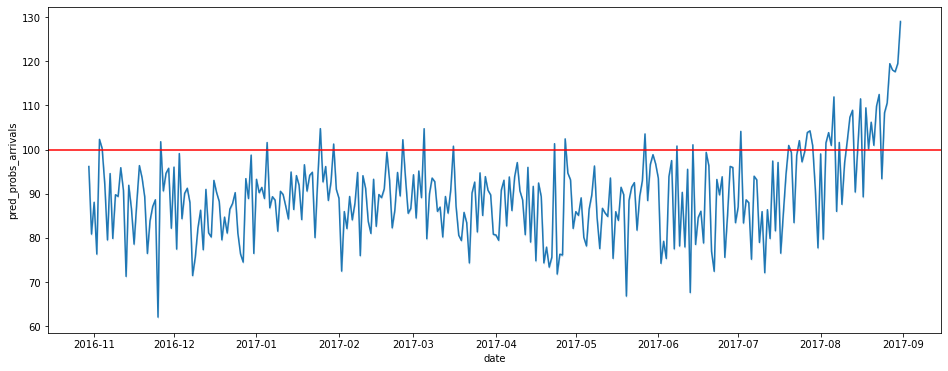

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,6))
sns.lineplot(data=simulation_df,x="date",y="pred_probs_arrivals")
plt.axhline(y=100, color='r', linestyle='-')
plt.show()

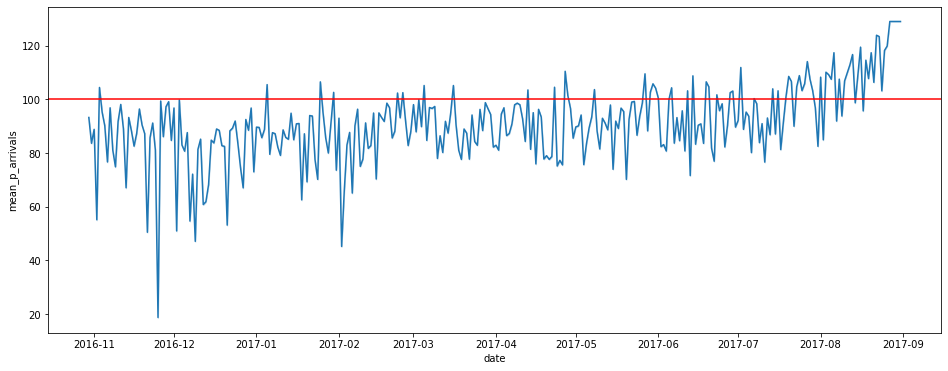

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,6))
sns.lineplot(data=simulation_df,x="date",y="mean_p_arrivals")
plt.axhline(y=100, color='r', linestyle='-')
plt.show()

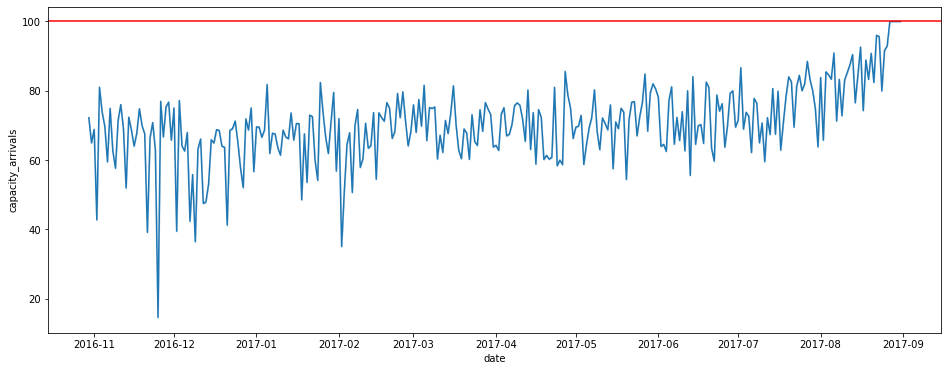

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(16,6))
sns.lineplot(data=simulation_df,x="date",y="capacity_arrivals")
plt.axhline(y=100, color='r', linestyle='-')
plt.show()

The above figures gives the results of the simulation. 

The first figure is the proposed overbooking strategy using the estimated probability $\hat{p}$ while the second figure indicates the overbooking strategy with constant probability $p$.The last figure, is resampling bookings at capacity. The blue line indicates the average arrivals, and red represents overbooks or anytime capacity is exceeded. 

Booking at capacity never exceeds 100, overbooking with constant p is often over capacity, and the proposed strategy maintains arrivals consistently close to capacity and only exceeding capacity on rare occasions. 


# Discussions 


The problem with assuming the same probability of arrival is the increased standard deviation of arrivals. Any increase in the standard deviation of arrivals further strains the operation of the hotel. The proposed overbooking strategy resulted in a slight decrease in the standard deviation of arrivals. Further explorations could develop methods to lower the standard deviation of arrivals. This would have several benefits including more predictable workloads for staff and general ease of operation.

The most obvious area to improve this strategy would be to attempt other classification engines to get more accurate estimates for p. However, more powerful engines may reduce interpretability and require more data than a booking agent is able to collect at the time of a reservation. Additionally, more powerful classification engines may be more sensitive to changes in the business climate.


## Conclusions

This project has shown on overbooking strategy that slightly lowers the standard deviation of arrivals and reduces the expected number of empty rooms. This comes with the cost of a modest overbooking penalty. This method is validated with a simulation and the results are:

•	A hotel can expect to have 30% more guests arriving. 

•	A hotel will experience 60% fewer empty rooms.

•	This method comes at an expected cost of 0.75 rooms over capacity per day.

From the above performance results, this strategy can be employed and increase profits.


# References 

[1] “14 CFR 250.2B -- Carriers to Request Volunteers for Denied Boarding.” 14 CFR 250.2b -- Carriers to Request Volunteers for Denied Boarding., <https://www.ecfr.gov/current/title-14/chapter-II/subchapter-A/part-250/section-250.2b>. 


[2] Antonio, Nuno, et al. “Hotel Booking Demand Datasets.” Data in Brief, Elsevier, 29 Nov. 2018, <https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010>. 


[3] Leahy, John. “Too Many Orders? Yes, Says Consultant. No, Says Ex-Super-Salesman.” Leeham News and Analysis, 28 Jan. 2019, <https://leehamnews.com/2019/01/28/too-many-orders-yes-says-consultant-no-says-ex-super-salesman/>. 
